In [1]:
# Run from cmbenv

### Create a schedule

In [2]:
%%time
!./make_schedule.sh

TOAST INFO: Adding patch "south"
TOAST INFO: Rectangular format
TOAST INFO: Creating 'schedules'
TOAST INFO: 2025-07-01 00:10:00+00:00 is inside block out 2025/07/01-2025/07/01, advancing to 2025-07-02 00:00:00+00:00
TOAST INFO: Global timer: toast_ground_schedule:  0.01 seconds (1 calls)
CPU times: user 66.8 ms, sys: 1.58 ms, total: 68.3 ms
Wall time: 1.8 s


### Inspect what's inside the schedule

A 20 minute observation schedule is created above. Alternatively, the latest version full SAT schedule can be imported from [pwg-tds/pipe-s0002/v6/schedules/schedule_sat.txt](https://github.com/simonsobs/pwg-scripts/blob/24a8c8202e2f80fb9b5097ee0e2dcfe5c1c07114/pwg-tds/pipe-s0002/v6/schedules/schedule_sat.txt), which has been saved and is analysed below.

In [3]:
%%time
! python3 analyze_schedule.py schedules/schedule_sat_pipe-s0002-v6.txt

Starting to analyse schedule
Total time: 1.63 days. Scheduled time: 0.96 days (58.95% efficiency), 10 scans
Compromised by Sun: 0.00 days (0.00%), 0 scans
Compromised by Moon: 0.00 days (0.00%), 0 scans
        DEC-050..-030_RA+000.000..+011.613 :   0.06 days (  6.29%),    1 scans ( 10.00%)   0.00% rising. El:  55.0 <  55.0 +-   0.0 <  55.0
        DEC-050..-030_RA+034.839..+046.452 :   0.12 days ( 12.58%),    2 scans ( 20.00%)  50.00% rising. El:  55.0 <  55.0 +-   0.0 <  55.0
        DEC-050..-030_RA+046.452..+058.065 :   0.06 days (  6.29%),    1 scans ( 10.00%)   0.00% rising. El:  55.0 <  55.0 +-   0.0 <  55.0
        DEC-050..-030_RA+069.677..+081.290 :   0.06 days (  6.36%),    1 scans ( 10.00%)   0.00% rising. El:  55.0 <  55.0 +-   0.0 <  55.0
        DEC-050..-030_RA+081.290..+092.903 :   0.06 days (  6.36%),    1 scans ( 10.00%)   0.00% rising. El:  55.0 <  55.0 +-   0.0 <  55.0
        DEC-050..-030_RA+301.935..+313.548 :   0.12 days ( 12.58%),    2 scans ( 20.00%)  50.00% 

### Split schedule

In [4]:
! ./split_schedule.sh

Found 74 entries in schedule_sat_pipe-s0002-v6.txt


In [5]:
! cat schedules/split_schedule/schedule040.txt

#Site            Telescope        Latitude [deg] Longitude [deg]   Elevation [m]
 ATACAMA         SAT                     -22.958         -67.786          5200.0
#      Start time UTC        Stop time UTC Rotation Patch name                            Az min   Az max       El  Pass Sub
  2025-07-02 05:55:28  2025-07-02 06:15:23   270.00 south                                 109.74   147.44    55.00     0   6


In [6]:
#ONGOING: creating AxisManager from schedule

### Create axis manager from schedule

In [7]:
from utils import *

In [8]:
schedsplit_txt ='schedule_sat_pipe-s0002-v6.txt' #'split_schedule/schedule040.txt'

In [9]:
sched = np.genfromtxt(schedsplit_txt,
                      skip_header=2, usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                      dtype="U30,U30,U30,U30,f8,U30,f8,f8,f8,f8,f8,U8,i8,i8",
                      names=["UTC_st_day", "UTC_st_time", "UTC_en_day", "UTC_en_time", 
                             "rotation", "names", "az_mins", "az_maxs", 
                             "elevations", "pass","subpass"]) 

In [10]:
#Plot axis manager pointing info

Start Time          End Time            dT   Az0    Az1   


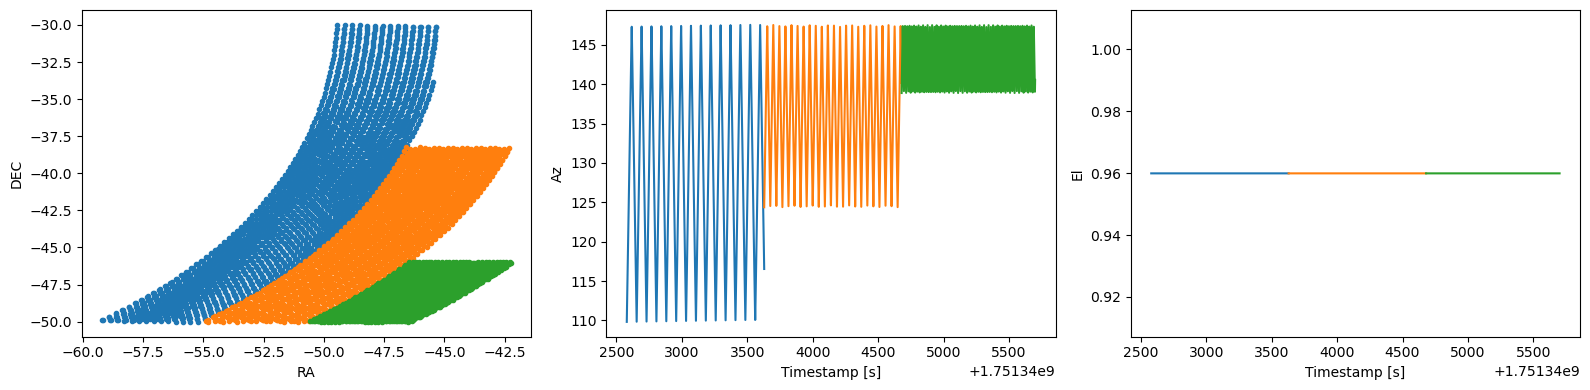

In [11]:
DEG = np.pi/180
sch = sched #[0]
fig, axes = plt.subplots(1, 3, figsize = (16,4))
ax = axes.flatten()
print(f"{'Start Time'.ljust(19)} {'End Time'.ljust(19)} {'dT'.ljust(4)} {'Az0'.ljust(6)} {'Az1'.ljust(6)}")
for s in sched[2:5]:
    ra_cen, dec_cen, aman = make_aman(s, fig, ax, make_plot=True)

In [12]:
aman

AxisManager(signal[dets,samps], timestamps[samps], focal_plane*[dets], boresight*[samps], boresight_radec*[samps], dets:LabelAxis(1), samps:IndexAxis(2041))

In [13]:
#ONGOING: check projection

In [14]:
#ONGOING: translate schedule into hits map

#### Continue to the next section

Go to [Section 4 - TOD simulation](Sec4_Simulate_TOD_breakdown.ipynb).